# INTRODUCTION
This project is to do an exploaratory data analysis on the biodiversity in U.S. national parks and gain insights from it.

**Questions:**
- Which parks have the most biodiversity?
- Is there a relationship between park size and biodiversity?
- Which category of species is the most/least observed in the parks?
- Which park has the highest/lowest number of endangered species?
- What is the relationship between Nativeness and the Conservation Status?


# FILES
Data was retrieved from Kaggle (www.kaggle.com) on 3/2/2023. It consists of two files:
- parks.csv which contains basic information for each park including name, location, and size.
- species.csv which contains species information for each park, including the category name, scientific name, common name, abundance, and conservation status.

# ANALYSIS

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## 2. Read the data in

In [2]:
# read parks data and specify columns to use
parks = pd.read_csv('assets/parks.csv', usecols=['Park Code', 'Park Name', 'State', 'Acres'])

In [3]:
# display first five rows to inspect data structure/content
parks.head()

,Park Code,Park Name,State,Acres
0,ACAD,Acadia National Park,ME,47390
1,ARCH,Arches National Park,UT,76519
2,BADL,Badlands National Park,SD,242756
3,BIBE,Big Bend National Park,TX,801163
4,BISC,Biscayne National Park,FL,172924


In [4]:
# read species data and specify columns to use
species = pd.read_csv('assets/species.csv', usecols=['Park Name', 'Category', 'Scientific Name', 'Common Names', 'Occurrence', 'Nativeness', 'Abundance', 'Conservation Status'])

In [5]:
# display first five rows to inspect data structure/content
species.head()

,Park Name,Category,Scientific Name,Common Names,Occurrence,Nativeness,Abundance,Conservation Status
0,Acadia National Park,Mammal,Alces alces,Moose,Present,Native,Rare,NaN
1,Acadia National Park,Mammal,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Present,Native,Abundant,NaN
2,Acadia National Park,Mammal,Canis latrans,"Coyote, Eastern Coyote",Present,Not Native,Common,Species of Concern
3,Acadia National Park,Mammal,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Not Confirmed,Native,NaN,Endangered
4,Acadia National Park,Mammal,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Present,Unknown,Common,NaN


## 3. Inspect and clean the datasets

In [6]:
#check rows and columns for parks
parks.shape

(56, 4)

In [7]:
#check rows and columns for species
species.shape

(119248, 8)

In [8]:
# check dtypes, etc. for parks
parks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Park Code  56 non-null     object
 1   Park Name  56 non-null     object
 2   State      56 non-null     object
 3   Acres      56 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.9+ KB


In [9]:
# check dtypes, etc. for species
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119248 entries, 0 to 119247
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Park Name            119248 non-null  object
 1   Category             119248 non-null  object
 2   Scientific Name      119248 non-null  object
 3   Common Names         119248 non-null  object
 4   Occurrence           99106 non-null   object
 5   Nativeness           94203 non-null   object
 6   Abundance            76306 non-null   object
 7   Conservation Status  4718 non-null    object
dtypes: object(8)
memory usage: 7.3+ MB


In [10]:
# check for duplicates in parks
duplicates_parks = parks.duplicated()
print("number of duplicates:", duplicates_parks.sum())

number of duplicates: 0


In [11]:
# check for duplicates in species
duplicates_species = species.duplicated()
print("number of duplicates:", duplicates_species.sum())

number of duplicates: 81


In [12]:
# identify which rows in species are duplicates
duplicate_rows_species = species[species.duplicated(keep=False)]
duplicate_rows_species

,Park Name,Category,Scientific Name,Common Names,Occurrence,Nativeness,Abundance,Conservation Status
20187,Crater Lake National Park,Vascular Plant,Lupinus lepidus ssp. lyallii,None,Present,Native,Unknown,NaN
20188,Crater Lake National Park,Vascular Plant,Lupinus lepidus ssp. lyallii,None,Present,Native,Unknown,NaN
21263,Crater Lake National Park,Nonvascular Plant,Ankistrodesmus falcatus var. acicularis,None,NaN,NaN,NaN,NaN
21264,Crater Lake National Park,Nonvascular Plant,Ankistrodesmus falcatus var. acicularis,None,NaN,NaN,NaN,NaN
23251,Cuyahoga Valley National Park,Vascular Plant,Acorus calamus,Sweet Flag,Present,Native,Uncommon,NaN
...,...,...,...,...,...,...,...,...
103957,Shenandoah National Park,Vascular Plant,Rosa cinnamomea,Cinnamon Rose,NaN,NaN,NaN,NaN
111697,Yellowstone National Park,Bird,Cardellina pusilla,Wilson's Warbler,Present,Native,Uncommon,NaN
111698,Yellowstone National Park,Bird,Cardellina pusilla,Wilson's Warbler,Present,Native,Uncommon,NaN
113986,Yellowstone National Park,Insect,Atherix,None,Present,Unknown,Unknown,NaN


In [13]:
# drop duplicate rows in species
species_drop = species.drop_duplicates()

In [14]:
# check how many rows are left in species after duplicates dropped (it was 119248 before dropping duplicate rows)
len(species_drop.index)

119167

## 4. Merge data and clean dataframe

In [15]:
# merge datasets
df = pd.merge(parks, species_drop, left_on='Park Name', right_on='Park Name')

In [16]:
# display first five rows to inspect data structure/content
df.head()

,Park Code,Park Name,State,Acres,Category,Scientific Name,Common Names,Occurrence,Nativeness,Abundance,Conservation Status
0,ACAD,Acadia National Park,ME,47390,Mammal,Alces alces,Moose,Present,Native,Rare,NaN
1,ACAD,Acadia National Park,ME,47390,Mammal,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Present,Native,Abundant,NaN
2,ACAD,Acadia National Park,ME,47390,Mammal,Canis latrans,"Coyote, Eastern Coyote",Present,Not Native,Common,Species of Concern
3,ACAD,Acadia National Park,ME,47390,Mammal,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Not Confirmed,Native,NaN,Endangered
4,ACAD,Acadia National Park,ME,47390,Mammal,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Present,Unknown,Common,NaN


In [17]:
#check rows and columns for dataframe
df.shape

(119167, 11)

In [18]:
# check for missing values
df.isnull().sum()

Park Code                   0
Park Name                   0
State                       0
Acres                       0
Category                    0
Scientific Name             0
Common Names                0
Occurrence              20078
Nativeness              24981
Abundance               42877
Conservation Status    114449
dtype: int64

In [19]:
# replace missing values in the dataframe with "Missing"
df = df.fillna("Not listed")

## 5. Analyze data

### Which parks have the most biodiversity?

In [20]:
# count species
count_species = df['Park Name'].value_counts()

In [21]:
# show the top 10 parks with the most species/biodiversity
count_species.head(10)

Great Smoky Mountains National Park    6623
Redwood National Park                  6258
Shenandoah National Park               4651
Death Valley National Park             4438
Yellowstone National Park              3964
Crater Lake National Park              3758
North Cascades National Park           3363
Hawaii Volcanoes National Park         3298
Rocky Mountain National Park           3140
Great Basin National Park              2653
Name: Park Name, dtype: int64

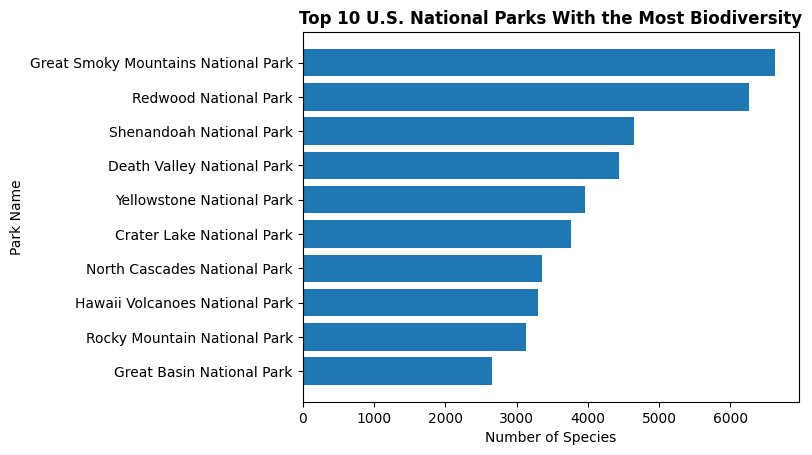

In [22]:
# plot the top 10 parks with the most species/biodiversity

top_10_parks = count_species.head(10)

x = top_10_parks.index
y = top_10_parks.values

plt.barh(x, y)
plt.gca().invert_yaxis()
plt.xlabel('Number of Species')
plt.ylabel('Park Name')
plt.title('Top 10 U.S. National Parks With the Most Biodiversity', fontweight='bold')

plt.show()

#### Notes on Findings
- With 6623 species, the park with the most biodiversity is the Great Smoky Mountains National Park.
- With 6258 species, the park with the second most biodiversity is Redwood National Park.
- The other parks in the top 10 all have over 2500 species. 
- The top 10 parks are spread out across the country.

### Is there a relationship between the size of a park and biodiversity?

In [23]:
# group by park name
group_by_park = df.groupby('Park Name')

In [24]:
# create variable for size of park 
park_size = group_by_park['Acres'].max()

In [25]:
# sort in descending order
sorted_park_size = park_size.sort_values(ascending=False)
sorted_park_size

Park Name
Wrangell - St Elias National Park and Preserve    8323148
Gates Of The Arctic National Park and Preserve    7523898
Death Valley National Park                        4740912
Katmai National Park and Preserve                 3674530
Denali National Park and Preserve                 3372402
Glacier Bay National Park and Preserve            3224840
Lake Clark National Park and Preserve             2619733
Yellowstone National Park                         2219791
Kobuk Valley National Park                        1750717
Everglades National Park                          1508538
Grand Canyon National Park                        1217403
Glacier National Park                             1013572
Olympic National Park                              922651
Sequoia and Kings Canyon National Parks            865952
Big Bend National Park                             801163
Joshua Tree National Park                          789745
Yosemite National Park                             761266
Kena

In [26]:
count_species

Great Smoky Mountains National Park               6623
Redwood National Park                             6258
Shenandoah National Park                          4651
Death Valley National Park                        4438
Yellowstone National Park                         3964
Crater Lake National Park                         3758
North Cascades National Park                      3363
Hawaii Volcanoes National Park                    3298
Rocky Mountain National Park                      3140
Great Basin National Park                         2653
Grand Canyon National Park                        2621
Haleakala National Park                           2580
Glacier National Park                             2556
Mammoth Cave National Park                        2499
Congaree National Park                            2321
Joshua Tree National Park                         2294
Big Bend National Park                            2269
Yosemite National Park                            2088
Everglades

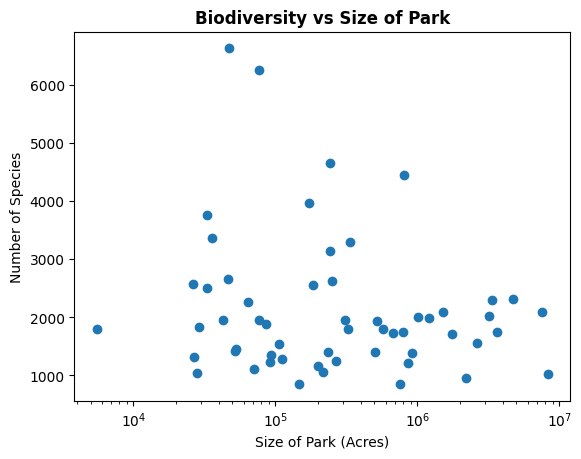

In [27]:
# create scatter plot of park size and species count

plt.scatter(park_size, count_species)

plt.xscale('log')

plt.xlabel('Size of Park (Acres)')
plt.ylabel('Number of Species')
plt.title('Biodiversity vs Size of Park', fontweight='bold')

plt.show()

#### Notes on Findings
The scatter plot shows a wide range of variation in biodiversity for a given park size. This suggests that there are other variables that factor into the biodiversity in a park.

### Which category of species is the most/least observed in the parks?

In [28]:
# count number of each category of species
df['Category'].value_counts()

Vascular Plant         65208
Bird                   14600
Insect                 14348
Fungi                   6140
Nonvascular Plant       4276
Fish                    3956
Mammal                  3867
Invertebrate            1566
Reptile                 1343
Algae                    975
Slug/Snail               787
Spider/Scorpion          776
Amphibian                743
Crab/Lobster/Shrimp      582
Name: Category, dtype: int64

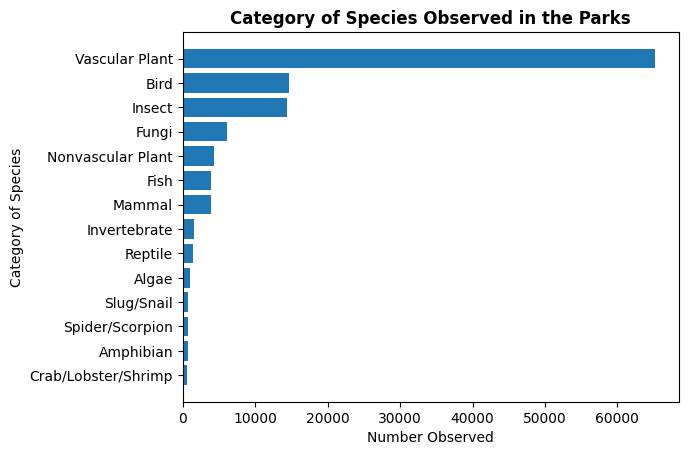

In [29]:
# create bar chart of category of species observed in the parks
species_in_parks = df['Category'].value_counts()

x = species_in_parks.index
y = species_in_parks.values

plt.barh(x, y)
plt.gca().invert_yaxis()
plt.xlabel('Number Observed')
plt.ylabel('Category of Species')
plt.title('Category of Species Observed in the Parks', fontweight='bold')

plt.show()

#### Note on Findings
Vascular Plants are observed far more frequently than any other category of species.

### Which park has the highest/lowest number of endangered species?

In [30]:
# filter to select rows with Endangered in the Conservation Status column
endangered_species = df[df['Conservation Status'] == 'Endangered']

# group the endangered_species by Park Name and count number of occurences
endangered_by_park = endangered_species.groupby('Park Name')['Conservation Status'].count()

# sort in descending order
endangered_by_park = endangered_by_park.sort_values(ascending=False)
endangered_by_park

Park Name
Hawaii Volcanoes National Park                    44
Haleakala National Park                           40
Channel Islands National Park                     24
Death Valley National Park                        24
Redwood National Park                             21
Everglades National Park                          16
Great Smoky Mountains National Park               13
Mammoth Cave National Park                        13
Biscayne National Park                            12
Big Bend National Park                            11
Grand Canyon National Park                        11
Glacier Bay National Park and Preserve             9
Kenai Fjords National Park                         8
Canyonlands National Park                          7
Mesa Verde National Park                           6
Lassen Volcanic National Park                      6
Katmai National Park and Preserve                  6
Joshua Tree National Park                          6
Capitol Reef National Park          

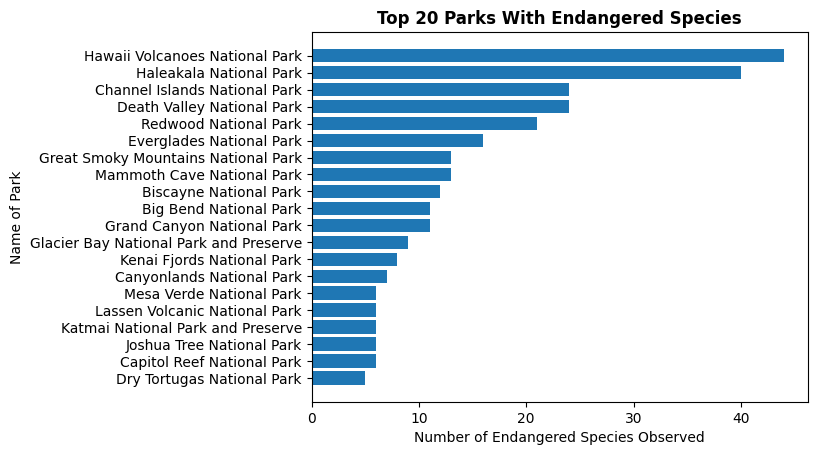

In [31]:
endangered_by_park_20 = endangered_by_park.head(20)

x = endangered_by_park_20.index
y = endangered_by_park_20.values

plt.barh(x, y)
plt.gca().invert_yaxis()
plt.xlabel('Number of Endangered Species Observed')
plt.ylabel('Name of Park')
plt.title('Top 20 Parks With Endangered Species', fontweight='bold')

plt.show()

#### Notes on Findings
- Hawaii Volcanoes National Park has the highest number of endangered species observed with 44 species.
- Haleakala National Park has the second highest number of endangered species observed with 40 species.
- The top two parks with the highest number of endangered species observed are both in Hawaii.

### Is there a relationship between Nativeness and the Conservation Status?

In [32]:
# check distribution of values in the Nativeness column
df['Nativeness'].value_counts()

Native           75946
Not listed       24981
Not Native       11095
Unknown           7088
Present             53
Not Confirmed        4
Name: Nativeness, dtype: int64

In [33]:
# check distribution of values in the Conservation Status column
df['Conservation Status'].value_counts()

Not listed             114449
Species of Concern       3843
Endangered                374
Under Review              194
Threatened                184
In Recovery                77
Proposed Endangered        24
Proposed Threatened         7
Breeder                     7
Resident                    5
Migratory                   2
Extinct                     1
Name: Conservation Status, dtype: int64

In [34]:
# create pivot table showing relationship between Nativeness and Conservation Status
pivot_table = pd.pivot_table(df, values='Scientific Name', index='Nativeness', columns='Conservation Status', aggfunc=len)
pivot_table

Conservation Status,Breeder,Endangered,Extinct,In Recovery,Migratory,Not listed,Proposed Endangered,Proposed Threatened,Resident,Species of Concern,Threatened,Under Review
Nativeness,,,,,,,,,,,,
Native,NaN,295.0,NaN,71.0,NaN,71787.0,21.0,7.0,NaN,3488.0,139.0,138.0
Not Confirmed,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
Not Native,NaN,10.0,1.0,1.0,NaN,10992.0,2.0,NaN,NaN,74.0,11.0,4.0
Not listed,NaN,52.0,NaN,3.0,NaN,24678.0,1.0,NaN,NaN,179.0,26.0,42.0
Present,7.0,NaN,NaN,NaN,2.0,39.0,NaN,NaN,5.0,NaN,NaN,NaN
Unknown,NaN,17.0,NaN,2.0,NaN,6949.0,NaN,NaN,NaN,102.0,8.0,10.0


#### Note on Findings
- There are a significant number of rows for which the Nativeness and Conservation Status are not listed. Most of the rows do not have a Conservation Status listed.
- Of those that have information listed, there are more Native species than Not Native species. 
- There are more Native species that are Endangered, In Recovery, Proposed Endangered, Species of Concern, Threatened, and Under Review than Not Native species.

# CONCLUSION

## Summary of results
- The park with the most biodiversity is the Great Smoky Mountains National Park.
- The top 10 parks with the most biodiversity are spread out across the country.
- There is a wide range of variation in biodiversity for a given park size, which suggests that there are other variables that factor into the biodiversity in a park.
- Vascular Plants are observed far more frequently than any other category of species.
- The top two parks with the highest number of endangered species observed, Hawaii Volcanoes National Park and Haleakala National Park, are both in Hawaii.
- Of those that have Nativeness and Conservation Status information listed, there are more Native species than Not Native species, and there are more Native species that are Endangered, Proposed Endangered, of Concern, Threated, and Under Review than Not Native species.

## Suggestions for Further Study